## COVID & RARs

In [124]:
import numpy as np
import pandas as pd
import os
import datetime as dt

d = pd.read_csv('/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/sleep_diaries/qualtrics+redcap.csv', parse_dates = ['session1_date'])
d['session1_date'] = d['session1_date'].ffill()
d['COVID'] = np.where(d['session1_date'] <= dt.datetime.strptime('03/14/2020', '%m/%d/%Y'), 'Pre-COVID', 'COVID')
# d = d[d['redcap_event_name'].str.contains('day')]

In [125]:
d['record_id'] = d['record_id'].fillna(d['Subject'])
d['record_id'] = d['record_id'].astype(str).apply(lambda x: x.split('.')[0].zfill(4))
d['record_id'] = np.where(d['record_id'].astype(int) < 10000, '1' + d['record_id'], d['record_id'])

d['age_group'] = np.where(d['record_id'].astype(int) < 20000, 'Young Adults', 'Older Adults')

In [129]:
d.drop(['Unnamed: 0', 'Subject', 'experimenter_1_timestamp'], axis=1).set_index('record_id').to_csv(
'/Users/mcmahonmc/Box/CogNeuroLab/Wearables/data/sleep_diaries/qualtrics+redcap_mm.csv', index=True)

0    False
Name: record_id, dtype: bool

In [75]:
cols = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleep_diaries/WearableAssessment-SleepSurveys_DATA_LABELS_2020-08-08_1643.csv').columns
cols = cols[cols.str.contains('Which of the following did you do yesterday?')].tolist()
cols = [i.split('choice=', 1)[1] for i in cols]
cols = [i.split(')', 1)[0] for i in cols]
cols = ['Date', 'record_id', 'age_group'] + cols + ['Sadness','Happiness','Stress','Rumination','Alcohol', 'COVID']
cols

['Date',
 'record_id',
 'age_group',
 'Attending classes, meetings',
 'Being physically animated, moving around',
 'Browsing the internet',
 'Commuting, traveling',
 'Doing a favor, helping others',
 'Doing household chores',
 'Doing nothing (sitting around, daydreaming',
 'Drinking, eating',
 'Exercising, physical activity, sports',
 'Hygienic activities (grooming, showering',
 'Listening to music',
 'Playing a game',
 'Reading',
 'Resting, napping',
 'Running errands',
 'Studying',
 'Shopping',
 'Spiritual, religious activity',
 'Talking, socializing in person',
 'Texting, talking on the phone',
 'Thinking, reflecting',
 'Using social media',
 'Using a computer',
 'Walking, running',
 'Watching TV, movies',
 'Working',
 'None of the above',
 'Sadness',
 'Happiness',
 'Stress',
 'Rumination',
 'Alcohol',
 'COVID']

In [76]:
d = d.filter(regex = 'session1_date|record_id|age_group|COVID|activities*|sad|happy|stress_a11e49|ruminate|alcoholic_drinks')
d.columns = cols
d

,Date,record_id,age_group,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming",...,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol,COVID
2,2019-10-24 17:31:00,11,Younger Adults,NaN,2.0,87.0,6.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Pre
3,2019-10-24 17:31:00,11,Younger Adults,NaN,0.0,89.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
4,2019-10-24 17:31:00,11,Younger Adults,NaN,0.0,93.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
5,2019-10-24 17:31:00,11,Younger Adults,NaN,0.0,98.0,0.0,2.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Pre
6,2019-10-24 17:31:00,11,Younger Adults,NaN,0.0,92.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,2020-08-25 09:00:00,140,Younger Adults,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Post
553,2020-08-27 17:00:00,143,Younger Adults,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Post
557,2020-08-25 10:00:00,144,Younger Adults,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Post
558,2020-08-25 10:00:00,144,Younger Adults,NaN,NaN,NaN,NaN,NaN,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Post


In [78]:
df = d.groupby(['record_id', 'age_group', 'COVID', 'Date'], group_keys = ['age_group', 'COVID']).mean()
df = df.reset_index()
df

,record_id,age_group,COVID,Date,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
0,11,Younger Adults,Pre,2019-10-24 17:31:00,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.076923,0.923077,0.923077,0.538462,1.000000,0.0
1,12,Younger Adults,Pre,2019-10-18 16:35:00,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,...,0.142857,0.428571,0.000000,0.071429,0.857143,1.000000,0.571429,0.571429,0.285714,0.0
2,14,Younger Adults,Pre,2019-11-11 17:59:00,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,...,0.000000,0.583333,0.250000,0.083333,0.583333,0.583333,0.333333,1.000000,0.416667,0.0
3,16,Younger Adults,Pre,2020-01-24 12:40:00,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,...,0.000000,0.857143,0.857143,0.071429,1.000000,0.928571,0.857143,0.928571,0.714286,0.0
4,23,Younger Adults,Pre,2019-11-11 14:45:00,3.333333,48.714286,54.928571,65.928571,65.642857,0.785714,...,0.000000,0.214286,0.714286,0.142857,0.142857,0.428571,0.214286,0.285714,0.000000,0.0
5,24,Younger Adults,Pre,2019-11-05 16:04:00,NaN,42.230769,67.846154,59.692308,28.000000,0.769231,...,0.076923,1.000000,1.000000,0.846154,0.923077,0.769231,0.923077,0.692308,0.000000,0.0
6,25,Younger Adults,Pre,2019-12-05 15:07:00,NaN,28.642857,70.714286,68.785714,33.142857,0.428571,...,0.000000,0.857143,0.928571,0.000000,0.928571,0.857143,0.071429,0.857143,0.000000,0.0
7,33,Younger Adults,Pre,2019-11-07 15:38:00,1.000000,31.692308,64.846154,51.615385,27.461538,0.615385,...,0.000000,0.615385,0.846154,0.615385,0.923077,1.000000,0.923077,1.000000,0.692308,0.0
8,35,Younger Adults,Pre,2020-02-07 14:00:00,NaN,47.750000,65.750000,45.333333,28.166667,0.500000,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,0.000000,0.0
9,38,Younger Adults,Pre,2020-01-22 10:41:00,NaN,17.266667,65.866667,28.733333,6.933333,0.666667,...,0.000000,1.000000,0.933333,0.400000,1.000000,0.533333,1.000000,0.800000,0.333333,0.0


In [85]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S.%f').dt.date

In [86]:
ya = df[df['age_group'] == "Younger Adults"]
oa = df[df['age_group'] == "Older Adults"]

In [87]:
ya

,record_id,age_group,COVID,Date,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
0,11,Younger Adults,Pre,2019-10-24,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.076923,0.923077,0.923077,0.538462,1.000000,0.0
1,12,Younger Adults,Pre,2019-10-18,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,...,0.142857,0.428571,0.000000,0.071429,0.857143,1.000000,0.571429,0.571429,0.285714,0.0
2,14,Younger Adults,Pre,2019-11-11,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,...,0.000000,0.583333,0.250000,0.083333,0.583333,0.583333,0.333333,1.000000,0.416667,0.0
3,16,Younger Adults,Pre,2020-01-24,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,...,0.000000,0.857143,0.857143,0.071429,1.000000,0.928571,0.857143,0.928571,0.714286,0.0
4,23,Younger Adults,Pre,2019-11-11,3.333333,48.714286,54.928571,65.928571,65.642857,0.785714,...,0.000000,0.214286,0.714286,0.142857,0.142857,0.428571,0.214286,0.285714,0.000000,0.0
5,24,Younger Adults,Pre,2019-11-05,NaN,42.230769,67.846154,59.692308,28.000000,0.769231,...,0.076923,1.000000,1.000000,0.846154,0.923077,0.769231,0.923077,0.692308,0.000000,0.0
6,25,Younger Adults,Pre,2019-12-05,NaN,28.642857,70.714286,68.785714,33.142857,0.428571,...,0.000000,0.857143,0.928571,0.000000,0.928571,0.857143,0.071429,0.857143,0.000000,0.0
7,33,Younger Adults,Pre,2019-11-07,1.000000,31.692308,64.846154,51.615385,27.461538,0.615385,...,0.000000,0.615385,0.846154,0.615385,0.923077,1.000000,0.923077,1.000000,0.692308,0.0
8,35,Younger Adults,Pre,2020-02-07,NaN,47.750000,65.750000,45.333333,28.166667,0.500000,...,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.416667,0.000000,0.0
9,38,Younger Adults,Pre,2020-01-22,NaN,17.266667,65.866667,28.733333,6.933333,0.666667,...,0.000000,1.000000,0.933333,0.400000,1.000000,0.533333,1.000000,0.800000,0.333333,0.0


In [88]:
ya.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean()

,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating","Exercising, physical activity, sports","Hygienic activities (grooming, showering",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
COVID,,,,,,,,,,,,,,,,,,,,,
Post,3.000000,45.833333,47.250000,56.833333,54.500000,0.000000,0.000000,0.229167,0.062500,0.000000,...,0.000000,0.145833,0.250000,0.125000,0.229167,0.229167,0.166667,0.020833,0.208333,0.0
Pre,2.363946,30.882152,65.331654,47.368836,27.107122,0.509854,0.588128,0.851235,0.583438,0.220461,...,0.149406,0.774878,0.751325,0.398589,0.738031,0.809884,0.653932,0.652540,0.306876,0.0


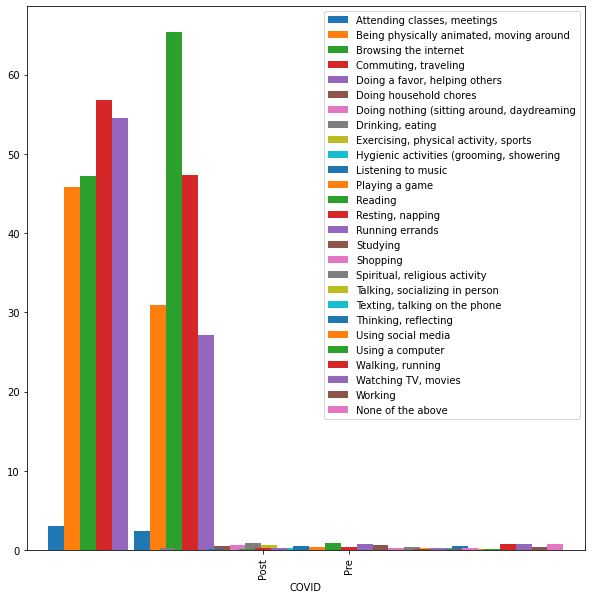

In [89]:
import matplotlib.pyplot as plt

ya.drop(['record_id', 'age_group'], axis = 1).drop(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol'], axis=1).groupby('COVID').mean().plot.bar(figsize = (10, 10), width = 5)

In [90]:
oa.drop(['record_id', 'age_group'], axis = 1).groupby('COVID').mean()

,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,"Doing nothing (sitting around, daydreaming","Drinking, eating","Exercising, physical activity, sports","Hygienic activities (grooming, showering",...,Using a computer,"Walking, running","Watching TV, movies",Working,None of the above,Sadness,Happiness,Stress,Rumination,Alcohol
COVID,,,,,,,,,,,,,,,,,,,,,
Post,2.681097,15.660329,69.438052,22.056808,9.699655,0.009615,0.669560,0.849796,0.228147,0.199602,...,0.163462,0.492882,0.687562,0.278648,0.339161,0.892982,0.686480,0.554935,0.035714,0.0
Pre,1.111111,9.363095,69.209890,24.975000,24.164286,0.196429,0.894048,0.666667,0.597619,0.177381,...,0.053571,0.796429,0.763095,0.490476,0.232143,0.628571,0.722619,0.877381,0.000000,0.0


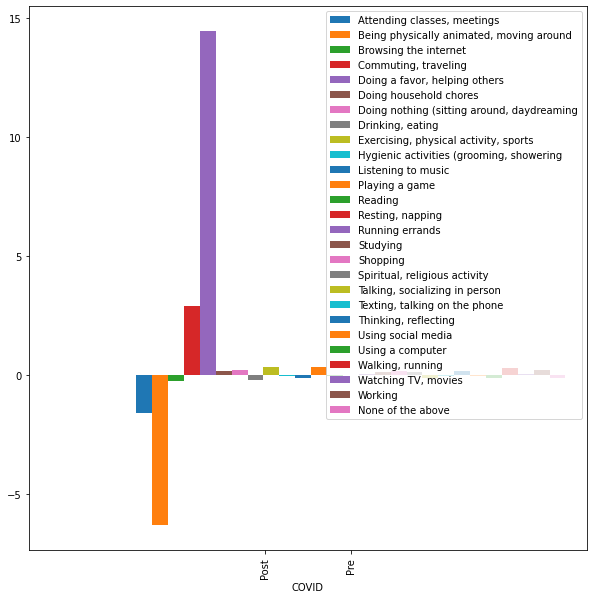

In [10]:
oa.drop(['record_id', 'age_group'], axis = 1).drop(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol'], axis=1).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

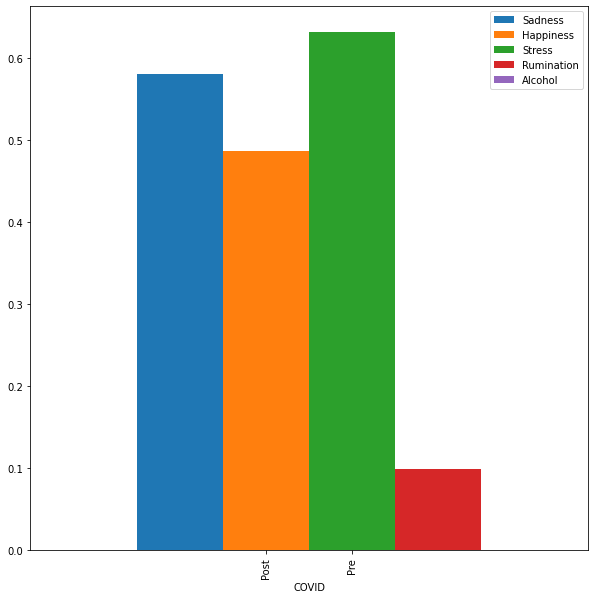

In [11]:
ya.drop(['record_id', 'age_group'], axis = 1).filter(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol', 'COVID']).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

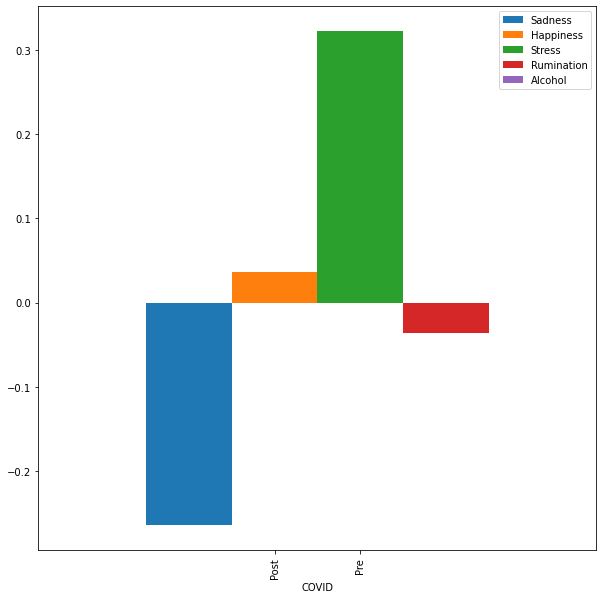

In [12]:
oa.drop(['record_id', 'age_group'], axis = 1).filter(['Sadness', 'Happiness', 'Stress', 'Rumination', 'Alcohol', 'COVID']).groupby('COVID').mean().diff().plot.bar(figsize = (10, 10), width = 5)

## Rest-activity measures

In [91]:
from pathlib import Path

home_dir = str(Path.home())
data_dir = os.path.join(home_dir, 'Box/CogNeuroLab/Wearables/data/')

cr_act = pd.read_csv(data_dir + 'actiwatch/cr_act.csv')
cr_fit = pd.read_csv(data_dir + 'fitbit/cr_fit.csv')

In [92]:
cr_act

,Unnamed: 0,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_8,amp_8,alpha_8,beta_8,...,actmin_9,amp_9,alpha_9,beta_9,phi_9,actmin_10,amp_10,alpha_10,beta_10,phi_10
0,10011,0.926547,1.918318,-0.755905,11.048685,14.784076,1.048502,1.820744,-0.768957,14.116680,...,1.138802,1.751555,-0.769275,13.077407,14.640288,1.224943,1.679419,-0.771686,13.103262,14.647762
1,10012,1.378773,1.292033,-0.678646,27.550534,16.719767,1.495630,1.244944,-0.670737,242.041087,...,1.539931,1.251899,-0.683620,35.043744,16.630148,1.650291,1.187647,-0.669102,128.574198,16.695249
2,10014,0.884033,1.900089,-0.674528,5.684151,16.509182,1.253679,1.560148,-0.634781,8.825521,...,1.134408,1.714623,-0.702504,5.662383,16.522354,1.174219,1.707071,-0.749634,5.894673,16.693879
3,10016,1.468134,1.524975,-0.713308,4.827810,14.861663,1.876402,1.110251,-0.638609,8.345245,...,1.986462,1.000147,-0.653490,11.215325,14.878230,2.000000,1.026854,-0.649055,9.323145,14.889224
4,10023,1.557971,1.316409,-0.847700,30.326722,17.214948,1.623609,1.262857,-0.854328,25.443347,...,0.918719,2.000000,-0.963765,10.012677,17.419379,0.923799,2.000000,-0.962816,9.911089,17.419177
5,10024,1.512172,1.433451,-0.778041,111.370676,17.715355,1.434893,1.531960,-0.845902,17.390694,...,1.456375,1.527078,-0.850324,16.522327,17.405997,1.529473,1.468556,-0.845740,15.775702,17.388752
6,10025,0.975649,2.000000,-0.881326,24.591993,17.976240,1.067892,1.919552,-0.886590,29.438422,...,1.431942,1.576254,-0.873654,35.584617,18.003330,1.510722,1.518388,-0.870267,33.124357,17.991938
7,10033,1.242332,1.568932,-0.639035,30.828475,14.462809,1.358338,1.456932,-0.639890,35.835635,...,1.443672,1.395669,-0.634033,37.387098,14.479904,1.518323,1.337446,-0.632711,34.659744,14.457030
8,10035,1.130006,1.765796,-0.724800,185.054356,17.175316,1.200379,1.758046,-0.729250,68.431043,...,1.302438,1.670913,-0.730694,55.758661,17.201939,1.373482,1.609488,-0.729089,69.604043,17.206138
9,10038,2.000000,0.898724,-0.737115,8.798833,15.399103,2.000000,0.930652,-0.753696,9.557341,...,2.000000,0.944748,-0.800310,5.964255,15.444921,2.000000,0.956250,-0.818246,6.253524,15.605556


In [93]:
cr_10 = cr_act.set_index("Unnamed: 0")
cr_10 = cr_10.filter(regex=("_10.*"))
cr_10

,actmin_10,amp_10,alpha_10,beta_10,phi_10
Unnamed: 0,,,,,
10011,1.224943,1.679419,-0.771686,13.103262,14.647762
10012,1.650291,1.187647,-0.669102,128.574198,16.695249
10014,1.174219,1.707071,-0.749634,5.894673,16.693879
10016,2.000000,1.026854,-0.649055,9.323145,14.889224
10023,0.923799,2.000000,-0.962816,9.911089,17.419177
10024,1.529473,1.468556,-0.845740,15.775702,17.388752
10025,1.510722,1.518388,-0.870267,33.124357,17.991938
10033,1.518323,1.337446,-0.632711,34.659744,14.457030
10035,1.373482,1.609488,-0.729089,69.604043,17.206138


In [94]:
df['record_id'] = np.where(df['age_group'] == 'Younger Adults', '1' + df['record_id'].astype(str).str.rjust(4, fillchar = '0'), '2' + df['record_id'].astype(str).str.rjust(4, fillchar = '0'))

In [95]:
df = df.set_index('record_id')

In [96]:
df.index = df.index.astype(str)
cr_10.index = cr_10.index.astype(str)

In [97]:
cr_10

,actmin_10,amp_10,alpha_10,beta_10,phi_10
Unnamed: 0,,,,,
10011,1.224943,1.679419,-0.771686,13.103262,14.647762
10012,1.650291,1.187647,-0.669102,128.574198,16.695249
10014,1.174219,1.707071,-0.749634,5.894673,16.693879
10016,2.000000,1.026854,-0.649055,9.323145,14.889224
10023,0.923799,2.000000,-0.962816,9.911089,17.419177
10024,1.529473,1.468556,-0.845740,15.775702,17.388752
10025,1.510722,1.518388,-0.870267,33.124357,17.991938
10033,1.518323,1.337446,-0.632711,34.659744,14.457030
10035,1.373482,1.609488,-0.729089,69.604043,17.206138


In [99]:
df = df.reset_index()
cr_10 = cr_10.reset_index()
cr_10['record_id'] = cr_10['Unnamed: 0']
cr_10 = cr_10.drop(['Unnamed: 0'], axis = 1)

In [101]:
new = []
new = df.merge(cr_10, on='record_id', how='outer')
new['COVID'] = new['COVID'].fillna('Post')
new

,index_x,record_id,age_group,COVID,Date,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",...,Happiness,Stress,Rumination,Alcohol,index_y,actmin_10,amp_10,alpha_10,beta_10,phi_10
0,0.0,10011,Younger Adults,Pre,2019-10-24,NaN,0.692308,96.384615,3.076923,0.153846,...,0.923077,0.538462,1.000000,0.0,0.0,1.224943,1.679419,-0.771686,13.103262,14.647762
1,1.0,10012,Younger Adults,Pre,2019-10-18,1.500000,5.857143,55.142857,49.500000,0.000000,...,0.571429,0.571429,0.285714,0.0,1.0,1.650291,1.187647,-0.669102,128.574198,16.695249
2,2.0,10014,Younger Adults,Pre,2019-11-11,2.000000,43.416667,52.000000,61.916667,51.916667,...,0.333333,1.000000,0.416667,0.0,2.0,1.174219,1.707071,-0.749634,5.894673,16.693879
3,3.0,10016,Younger Adults,Pre,2020-01-24,5.714286,37.785714,53.857143,43.214286,4.571429,...,0.857143,0.928571,0.714286,0.0,3.0,2.000000,1.026854,-0.649055,9.323145,14.889224
4,4.0,10023,Younger Adults,Pre,2019-11-11,3.333333,48.714286,54.928571,65.928571,65.642857,...,0.214286,0.285714,0.000000,0.0,4.0,0.923799,2.000000,-0.962816,9.911089,17.419177
5,5.0,10024,Younger Adults,Pre,2019-11-05,NaN,42.230769,67.846154,59.692308,28.000000,...,0.923077,0.692308,0.000000,0.0,5.0,1.529473,1.468556,-0.845740,15.775702,17.388752
6,6.0,10025,Younger Adults,Pre,2019-12-05,NaN,28.642857,70.714286,68.785714,33.142857,...,0.071429,0.857143,0.000000,0.0,6.0,1.510722,1.518388,-0.870267,33.124357,17.991938
7,7.0,10033,Younger Adults,Pre,2019-11-07,1.000000,31.692308,64.846154,51.615385,27.461538,...,0.923077,1.000000,0.692308,0.0,7.0,1.518323,1.337446,-0.632711,34.659744,14.457030
8,8.0,10035,Younger Adults,Pre,2020-02-07,NaN,47.750000,65.750000,45.333333,28.166667,...,1.000000,0.416667,0.000000,0.0,8.0,1.373482,1.609488,-0.729089,69.604043,17.206138
9,9.0,10038,Younger Adults,Pre,2020-01-22,NaN,17.266667,65.866667,28.733333,6.933333,...,1.000000,0.800000,0.333333,0.0,9.0,2.000000,0.956250,-0.818246,6.253524,15.605556


In [102]:
new['age_group'] = np.where(new['record_id'].astype(int) > 20000, 'Older Adults', 'Young Adults')

In [103]:
new['age_group']

0     Young Adults
1     Young Adults
2     Young Adults
3     Young Adults
4     Young Adults
5     Young Adults
6     Young Adults
7     Young Adults
8     Young Adults
9     Young Adults
10    Young Adults
11    Young Adults
12    Young Adults
13    Young Adults
14    Young Adults
15    Older Adults
16    Older Adults
17    Older Adults
18    Older Adults
19    Older Adults
20    Older Adults
21    Older Adults
22    Older Adults
23    Older Adults
24    Older Adults
25    Older Adults
26    Older Adults
27    Young Adults
28    Young Adults
29    Young Adults
30    Young Adults
31    Young Adults
32    Young Adults
33    Young Adults
34    Young Adults
35    Young Adults
36    Young Adults
37    Older Adults
38    Older Adults
39    Older Adults
40    Older Adults
41    Older Adults
Name: age_group, dtype: object

In [104]:
new['age_group'] = new['age_group'].astype('category')
new['age_group']= new['age_group'].cat.set_categories(["Young Adults", "Older Adults"], ordered = True)
new['COVID'] = new['COVID'].astype('category')
new['COVID'] = new['COVID'].cat.set_categories(["Pre", "Post"], ordered = True)
new

,index_x,record_id,age_group,COVID,Date,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",...,Happiness,Stress,Rumination,Alcohol,index_y,actmin_10,amp_10,alpha_10,beta_10,phi_10
0,0.0,10011,Young Adults,Pre,2019-10-24,NaN,0.692308,96.384615,3.076923,0.153846,...,0.923077,0.538462,1.000000,0.0,0.0,1.224943,1.679419,-0.771686,13.103262,14.647762
1,1.0,10012,Young Adults,Pre,2019-10-18,1.500000,5.857143,55.142857,49.500000,0.000000,...,0.571429,0.571429,0.285714,0.0,1.0,1.650291,1.187647,-0.669102,128.574198,16.695249
2,2.0,10014,Young Adults,Pre,2019-11-11,2.000000,43.416667,52.000000,61.916667,51.916667,...,0.333333,1.000000,0.416667,0.0,2.0,1.174219,1.707071,-0.749634,5.894673,16.693879
3,3.0,10016,Young Adults,Pre,2020-01-24,5.714286,37.785714,53.857143,43.214286,4.571429,...,0.857143,0.928571,0.714286,0.0,3.0,2.000000,1.026854,-0.649055,9.323145,14.889224
4,4.0,10023,Young Adults,Pre,2019-11-11,3.333333,48.714286,54.928571,65.928571,65.642857,...,0.214286,0.285714,0.000000,0.0,4.0,0.923799,2.000000,-0.962816,9.911089,17.419177
5,5.0,10024,Young Adults,Pre,2019-11-05,NaN,42.230769,67.846154,59.692308,28.000000,...,0.923077,0.692308,0.000000,0.0,5.0,1.529473,1.468556,-0.845740,15.775702,17.388752
6,6.0,10025,Young Adults,Pre,2019-12-05,NaN,28.642857,70.714286,68.785714,33.142857,...,0.071429,0.857143,0.000000,0.0,6.0,1.510722,1.518388,-0.870267,33.124357,17.991938
7,7.0,10033,Young Adults,Pre,2019-11-07,1.000000,31.692308,64.846154,51.615385,27.461538,...,0.923077,1.000000,0.692308,0.0,7.0,1.518323,1.337446,-0.632711,34.659744,14.457030
8,8.0,10035,Young Adults,Pre,2020-02-07,NaN,47.750000,65.750000,45.333333,28.166667,...,1.000000,0.416667,0.000000,0.0,8.0,1.373482,1.609488,-0.729089,69.604043,17.206138
9,9.0,10038,Young Adults,Pre,2020-01-22,NaN,17.266667,65.866667,28.733333,6.933333,...,1.000000,0.800000,0.333333,0.0,9.0,2.000000,0.956250,-0.818246,6.253524,15.605556


In [105]:
new = new[new['record_id'] != '20108']

Text(0.5, 0.98, 'Rest-Activity Measures by Age Group and Before vs During COVID-19')

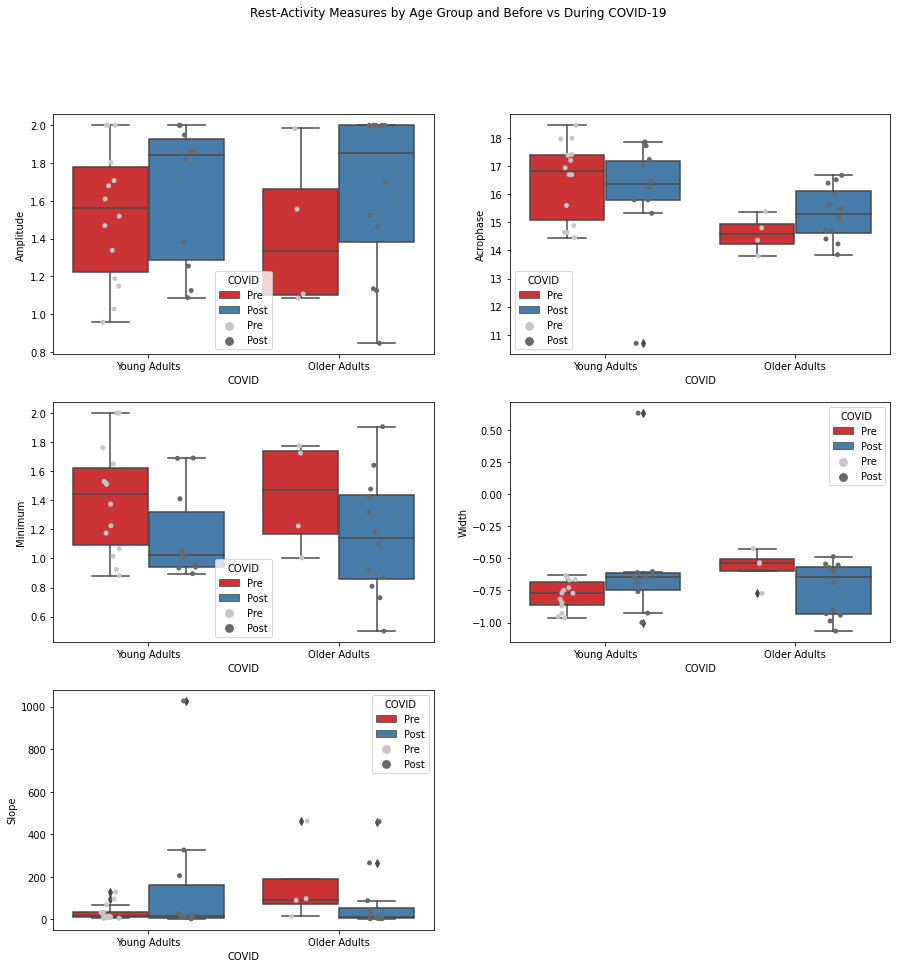

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

dplt = new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']]

f, axes = plt.subplots(3, 2, figsize = (15, 15))

#Amplitude
sns.boxplot(y='amp_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Amplitude'
)

sns.stripplot(y='amp_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Amplitude'
)

#Acrophase
sns.boxplot(y='phi_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,1], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Acrophase'
)

sns.stripplot(y='phi_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,1], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Acrophase'
)

#Minimum
sns.boxplot(y='actmin_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Minimum'
)

sns.stripplot(y='actmin_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Minimum'
)

#Width
sns.boxplot(y='alpha_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,1], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Width'
)

sns.stripplot(y='alpha_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,1], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Width'
)

#Slope
sns.boxplot(y='beta_10', x='age_group', hue='COVID', data=dplt, ax=axes[2,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Slope'
)

sns.stripplot(y='beta_10', x='age_group', hue='COVID', data=dplt, ax=axes[2,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Slope'
)

axes[2,1].set_axis_off()

plt.suptitle('Rest-Activity Measures by Age Group and Before vs During COVID-19')


In [131]:
dplt.groupby(['age_group', 'COVID']).describe()

actmin_10                                          \
                       count      mean       std       min       25%   
age_group    COVID                                                     
Young Adults Pre        14.0  1.402217  0.371381  0.881631  1.093862   
             Post       10.0  1.161652  0.313386  0.895484  0.944451   
Older Adults Pre         4.0  1.431826  0.378574  1.003838  1.168801   
             Post       12.0  1.156873  0.412491  0.500265  0.855335   

                                                 amp_10            ...  \
                         50%       75%       max  count      mean  ...   
age_group    COVID                                                 ...   
Young Adults Pre    1.442102  1.620086  2.000000   14.0  1.531677  ...   
             Post   1.021020  1.322119  1.690903   10.0  1.634745  ...   
Older Adults Pre    1.474378  1.737403  1.774709    4.0  1.432419  ...   
             Post   1.143076  1.434557  1.906623   12.0  1.649246  ...   

                       beta_10              phi_10                       \
                           75%          max  count       mean       std   
age_group    COVID                                                        
Young Adults Pre     34.275897   128.574198   14.0  16.499619  1.388591   
             Post   161.459621  1026.809200   10.0  16.018136  2.055123   
Older Adults Pre    188.948249   462.830611    4.0  14.587973  0.666891   
             Post    55.902585   459.647494   12.0  15.308284  0.954287   

                                                                           
                          min        25%        50%        75%        max  
age_group    COVID                                                         
Young Adults Pre    14.457030  15.068307  16.817147  17.411570  18.453573  
             Post   10.695129  15.799409  16.347720  17.189183  17.863953  
Older Adults Pre    13.805951  14.223425  14.583764  14.948312  15.378411  
             Post   13.848597  14.606522  15.307049  16.101634  16.670269  

[4 rows x 40 columns]

[Text(0, 0.5, 'Amplitude'), Text(0.5, 0, 'Date')]

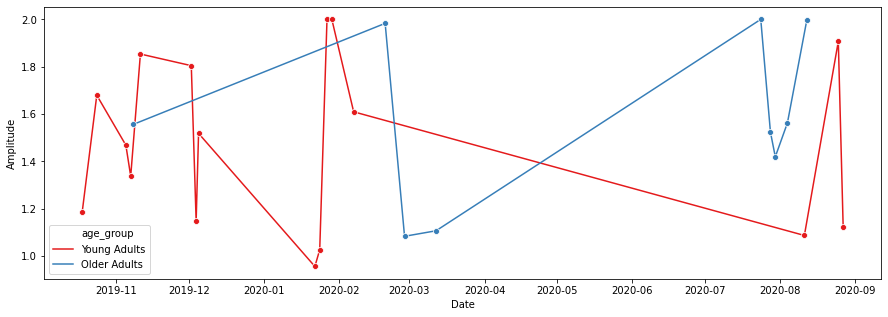

In [122]:
from matplotlib.dates import DateFormatter

f, ax = plt.subplots(1,1,figsize = (15, 5))

# seaborn scatterplot function does not work well with date axes
sns.lineplot(x='Date', y='amp_10', hue='age_group', data=new, palette = 'Set1', marker='o', ci=None).set(
    xlabel='Date', 
    ylabel='Amplitude'
)


In [174]:
adm_cr = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Aging Decision Making R01/data/actiwatch/cr_act.csv')
adm_cr = adm_cr.drop_duplicates()
adm_cr['age_group'] = np.where(adm_cr['record_id'].astype(int) > 40000, "Older Adults", "Young Adults")
adm_cr['record_id'] = adm_cr['Unnamed: 0'].astype(str)
adm_cr = adm_cr.set_index('record_id')
adm_cr = adm_cr.drop('Unnamed: 0', axis = 1)
adm_cr['COVID'] = "Pre"
adm_cr

,actmin_7,amp_7,alpha_7,beta_7,phi_7,actmin_10,amp_10,alpha_10,beta_10,phi_10,age_group,COVID
record_id,,,,,,,,,,,,
30004,1.357401,1.459738,-0.837516,106.968321,15.203047,1.537009,1.366887,-0.833258,102.995267,15.202815,Young Adults,Pre
30008,1.066466,1.710878,-0.854178,382.798689,16.597099,1.305286,1.548168,-0.851237,69.559291,16.642776,Young Adults,Pre
30009,1.116332,1.794457,-0.839709,385.716185,14.809336,1.344138,1.636883,-0.863182,76.577964,15.055337,Young Adults,Pre
30012,1.187387,1.950420,-0.663200,3.797362,15.695913,1.199202,2.000000,-0.759092,3.800583,15.333499,Young Adults,Pre
30015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Young Adults,Pre
...,...,...,...,...,...,...,...,...,...,...,...,...
40859,1.673475,1.245351,-0.555934,89.067630,14.460129,1.098294,2.000000,-0.878962,2.305140,13.127182,Older Adults,Pre
40861,0.762765,2.000000,-1.368115,2.433210,11.519207,0.822414,1.999996,-1.193216,4.396878,11.475632,Older Adults,Pre
40876,1.329235,1.494439,-0.749100,10.244468,16.128843,0.858697,2.000000,-0.911932,7.753458,16.400857,Older Adults,Pre


In [176]:
adm_new = []
adm_new = new.merge(adm_cr, on = ['record_id', 'age_group', 'COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10'], how = 'outer')
adm_new

,index_x,record_id,age_group,COVID,Date,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",...,actmin_10,amp_10,alpha_10,beta_10,phi_10,actmin_7,amp_7,alpha_7,beta_7,phi_7
0,0.0,10011,Young Adults,Pre,2019-10-24,NaN,0.692308,96.384615,3.076923,0.153846,...,1.224943,1.679419,-0.771686,13.103262,14.647762,NaN,NaN,NaN,NaN,NaN
1,1.0,10012,Young Adults,Pre,2019-10-18,1.500000,5.857143,55.142857,49.500000,0.000000,...,1.650291,1.187647,-0.669102,128.574198,16.695249,NaN,NaN,NaN,NaN,NaN
2,2.0,10014,Young Adults,Pre,2019-11-11,2.000000,43.416667,52.000000,61.916667,51.916667,...,1.174219,1.707071,-0.749634,5.894673,16.693879,NaN,NaN,NaN,NaN,NaN
3,3.0,10016,Young Adults,Pre,2020-01-24,5.714286,37.785714,53.857143,43.214286,4.571429,...,2.000000,1.026854,-0.649055,9.323145,14.889224,NaN,NaN,NaN,NaN,NaN
4,4.0,10023,Young Adults,Pre,2019-11-11,3.333333,48.714286,54.928571,65.928571,65.642857,...,0.923799,2.000000,-0.962816,9.911089,17.419177,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,NaN,40859,Older Adults,Pre,NaN,NaN,NaN,NaN,NaN,NaN,...,1.098294,2.000000,-0.878962,2.305140,13.127182,1.673475,1.245351,-0.555934,89.067630,14.460129
162,NaN,40861,Older Adults,Pre,NaN,NaN,NaN,NaN,NaN,NaN,...,0.822414,1.999996,-1.193216,4.396878,11.475632,0.762765,2.000000,-1.368115,2.433210,11.519207
163,NaN,40876,Older Adults,Pre,NaN,NaN,NaN,NaN,NaN,NaN,...,0.858697,2.000000,-0.911932,7.753458,16.400857,1.329235,1.494439,-0.749100,10.244468,16.128843
164,NaN,40878,Older Adults,Pre,NaN,NaN,NaN,NaN,NaN,NaN,...,1.753116,1.079151,-0.750643,17.516891,13.898634,1.259323,1.530327,-0.736466,25.637032,13.607152


In [177]:
adm_new = adm_new.drop('index_x', axis =1)

In [180]:
adm_new['age_group'] = adm_new['age_group'].astype('category')
adm_new['age_group']= adm_new['age_group'].cat.set_categories(["Young Adults", "Older Adults"], ordered = True)
adm_new['COVID'] = adm_new['COVID'].astype('category')
adm_new['COVID'] = adm_new['COVID'].cat.set_categories(["Pre", "Post"], ordered = True)
adm_new[0:5]

,record_id,age_group,COVID,Date,"Attending classes, meetings","Being physically animated, moving around",Browsing the internet,"Commuting, traveling","Doing a favor, helping others",Doing household chores,...,actmin_10,amp_10,alpha_10,beta_10,phi_10,actmin_7,amp_7,alpha_7,beta_7,phi_7
0,10011,Young Adults,Pre,2019-10-24,NaN,0.692308,96.384615,3.076923,0.153846,0.000000,...,1.224943,1.679419,-0.771686,13.103262,14.647762,NaN,NaN,NaN,NaN,NaN
1,10012,Young Adults,Pre,2019-10-18,1.500000,5.857143,55.142857,49.500000,0.000000,0.642857,...,1.650291,1.187647,-0.669102,128.574198,16.695249,NaN,NaN,NaN,NaN,NaN
2,10014,Young Adults,Pre,2019-11-11,2.000000,43.416667,52.000000,61.916667,51.916667,0.000000,...,1.174219,1.707071,-0.749634,5.894673,16.693879,NaN,NaN,NaN,NaN,NaN
3,10016,Young Adults,Pre,2020-01-24,5.714286,37.785714,53.857143,43.214286,4.571429,0.571429,...,2.000000,1.026854,-0.649055,9.323145,14.889224,NaN,NaN,NaN,NaN,NaN
4,10023,Young Adults,Pre,2019-11-11,3.333333,48.714286,54.928571,65.928571,65.642857,0.785714,...,0.923799,2.000000,-0.962816,9.911089,17.419177,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Rest-Activity Measures by Age Group and Before vs During COVID-19')

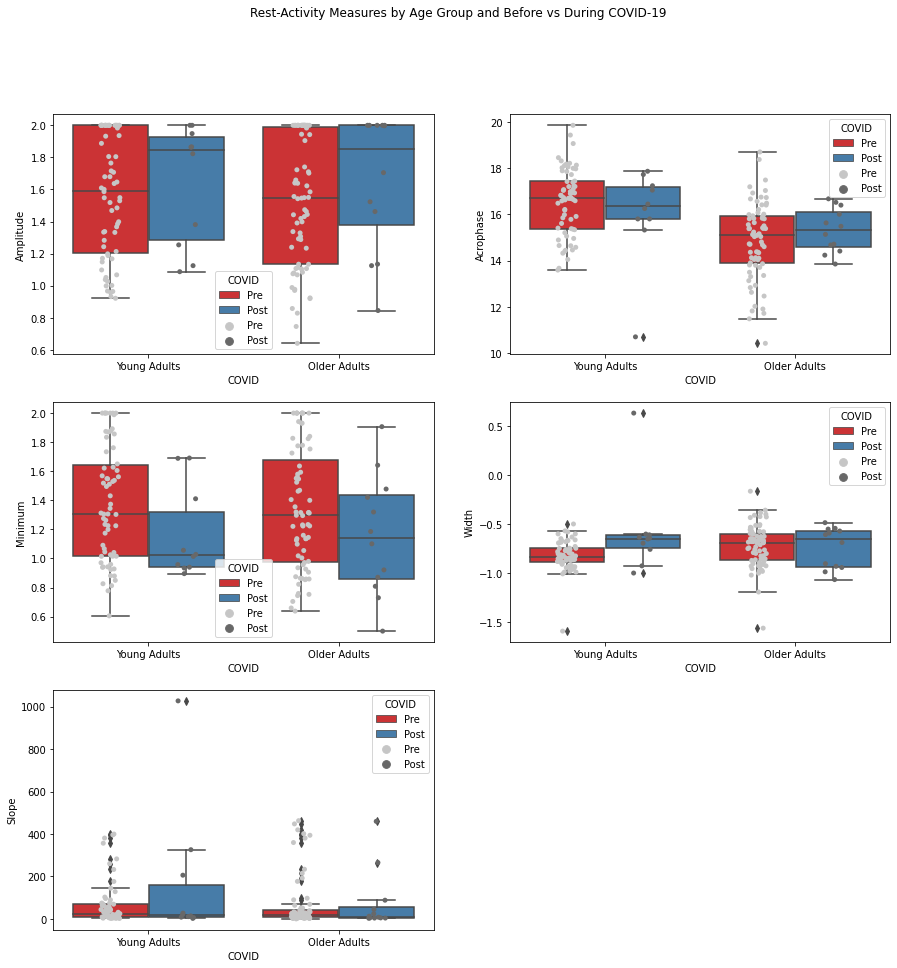

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

dplt = adm_new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']]

f, axes = plt.subplots(3, 2, figsize = (15, 15))

#Amplitude
sns.boxplot(y='amp_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Amplitude'
)

sns.stripplot(y='amp_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Amplitude'
)

#Acrophase
sns.boxplot(y='phi_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,1], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Acrophase'
)

sns.stripplot(y='phi_10', x='age_group', hue='COVID', data=dplt, ax=axes[0,1], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Acrophase'
)

#Minimum
sns.boxplot(y='actmin_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Minimum'
)

sns.stripplot(y='actmin_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Minimum'
)

#Width
sns.boxplot(y='alpha_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,1], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Width'
)

sns.stripplot(y='alpha_10', x='age_group', hue='COVID', data=dplt, ax=axes[1,1], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Width'
)

#Slope
sns.boxplot(y='beta_10', x='age_group', hue='COVID', data=dplt, ax=axes[2,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Slope'
)

sns.stripplot(y='beta_10', x='age_group', hue='COVID', data=dplt, ax=axes[2,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Slope'
)

axes[2,1].set_axis_off()

plt.suptitle('Rest-Activity Measures by Age Group and Before vs During COVID-19')



In [194]:
dplt = adm_new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']]
dplt[dplt['COVID'] == 'Post'].shape

(22, 7)

In [196]:
dplt = adm_new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']]
dSamp = dplt[dplt['COVID']=='Pre'].dropna().sample(n=22)
dSamp0 = pd.concat([dSamp, dplt[dplt['COVID'] == 'Post']], axis =0)
dSamp0

,age_group,COVID,actmin_10,amp_10,alpha_10,beta_10,phi_10
160,Older Adults,Pre,1.315995,1.585087,-0.513763,30.862741,15.035417
144,Older Adults,Pre,1.297124,1.390919,-0.637561,25.573129,15.383399
111,Older Adults,Pre,0.956730,2.000000,-0.684021,4.239767,14.597916
1,Young Adults,Pre,1.650291,1.187647,-0.669102,128.574198,16.695249
3,Young Adults,Pre,2.000000,1.026854,-0.649055,9.323145,14.889224
42,Young Adults,Pre,1.305286,1.548168,-0.851237,69.559291,16.642776
165,Older Adults,Pre,1.593267,0.977083,-0.925511,26.170286,11.712586
102,Older Adults,Pre,1.930466,0.970263,-0.764473,28.126841,16.666436
81,Young Adults,Pre,1.019572,2.000000,-0.941102,21.564468,14.317377
101,Older Adults,Pre,1.135401,2.000000,-0.666926,3.812463,15.157394


Text(0.5, 0.98, 'Rest-Activity Measures by Age Group and Before vs During COVID-19')

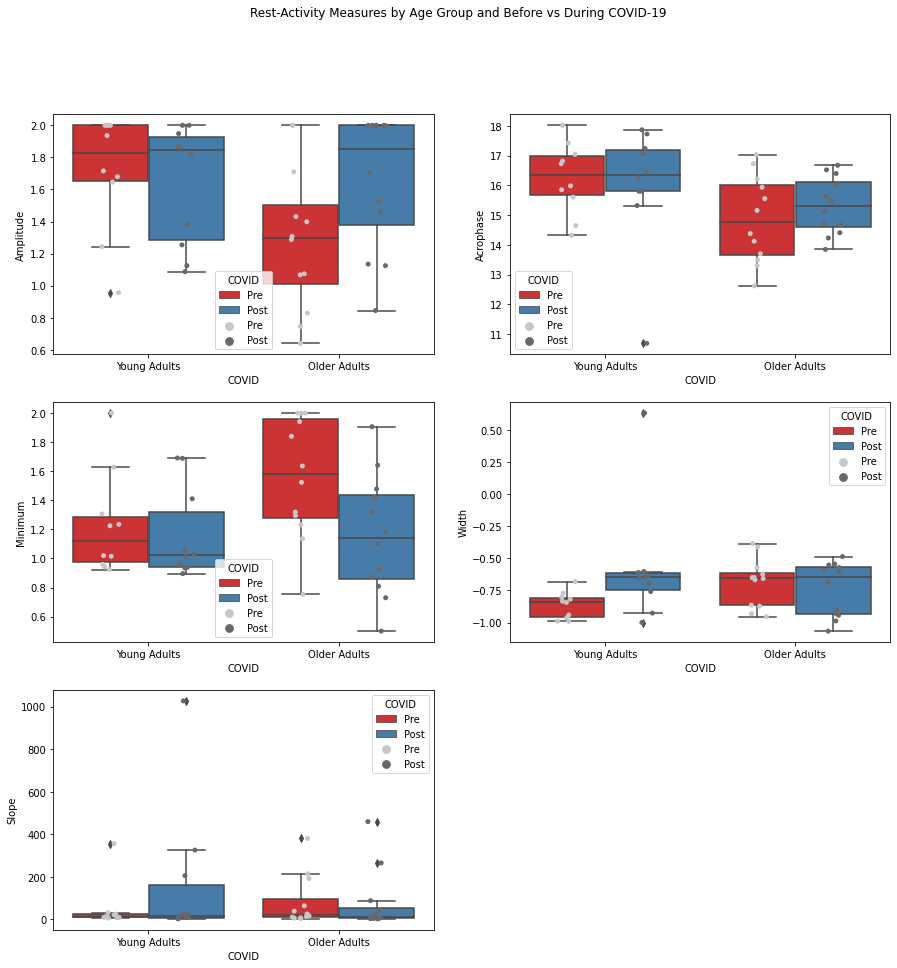

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

dplt = adm_new[['age_group','COVID', 'actmin_10', 'amp_10', 'alpha_10', 'beta_10', 'phi_10']]
dSamp = dplt[dplt['COVID']=='Pre'].dropna().sample(n=22)
dSamp0 = pd.concat([dSamp, dplt[dplt['COVID'] == 'Post']], axis =0)
dSamp0

##

f, axes = plt.subplots(3, 2, figsize = (15, 15))

#Amplitude
sns.boxplot(y='amp_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[0,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Amplitude'
)

sns.stripplot(y='amp_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[0,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Amplitude'
)

#Acrophase
sns.boxplot(y='phi_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[0,1], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Acrophase'
)

sns.stripplot(y='phi_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[0,1], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Acrophase'
)

#Minimum
sns.boxplot(y='actmin_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[1,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Minimum'
)

sns.stripplot(y='actmin_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[1,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Minimum'
)

#Width
sns.boxplot(y='alpha_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[1,1], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Width'
)

sns.stripplot(y='alpha_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[1,1], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Width'
)

#Slope
sns.boxplot(y='beta_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[2,0], palette = 'Set1').set(
    xlabel='COVID', 
    ylabel='Slope'
)

sns.stripplot(y='beta_10', x='age_group', hue='COVID', data=dSamp0, ax=axes[2,0], palette = 'Greys', dodge=True).set(
    xlabel='COVID', 
    ylabel='Slope'
)

axes[2,1].set_axis_off()

plt.suptitle('Rest-Activity Measures by Age Group and Before vs During COVID-19')




## PVT and rhythm amplitude

In [37]:
pvt = pd.read_csv(data_dir + 'PVT/pvt_results.csv', na_values = 'nan', keep_default_na = True)
pvt = pvt.set_index('record_id').astype(str)
pvt = pvt.astype(float)
pvt

,Unnamed: 0,RT,FS,NR
record_id,,,,
10011,0.0,0.287571,0.0,0.0
10012,1.0,0.292187,3.0,0.0
10014,2.0,0.343802,6.0,0.0
10023,3.0,0.295579,2.0,0.0
10024,4.0,0.286903,1.0,0.0
10025,5.0,0.245413,1.0,0.0
10033,6.0,0.343700,0.0,0.0
10035,7.0,0.267186,1.0,0.0
10038,8.0,0.270828,2.0,0.0


In [38]:
n = new.join(pvt)
n = n[n['RT'] < 6.5]
ya = n[n['age_group'] == "Younger Adults"]
oa = n[n['age_group'] == "Older Adults"]

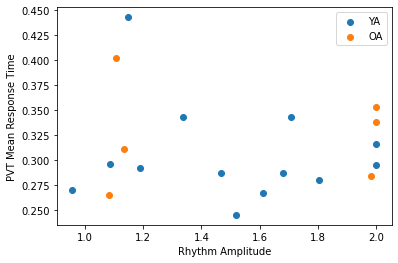

In [39]:
plt.scatter(ya['amp_10'].values, ya['RT'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['RT'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT Mean Response Time")
plt.legend()

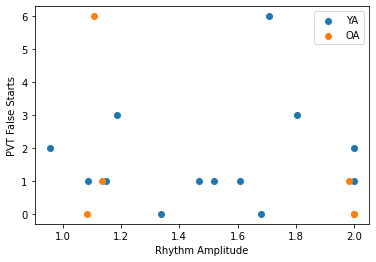

In [40]:
plt.scatter(ya['amp_10'].values, ya['FS'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['FS'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT False Starts")
plt.legend()

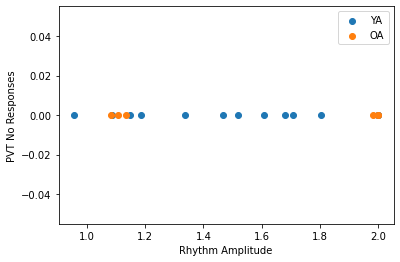

In [41]:
plt.scatter(ya['amp_10'].values, ya['NR'].values, label = "YA")
plt.scatter(oa['amp_10'].values, oa['NR'].values, label = "OA")
plt.xlabel("Rhythm Amplitude")
plt.ylabel("PVT No Responses")
plt.legend()

## PVT and acrophase

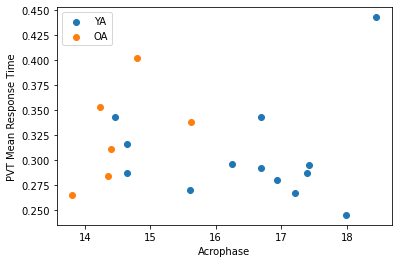

In [42]:
plt.scatter(ya['phi_10'].values, ya['RT'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['RT'].values, label = "OA")
plt.xlabel("Acrophase")
plt.ylabel("PVT Mean Response Time")
plt.legend()

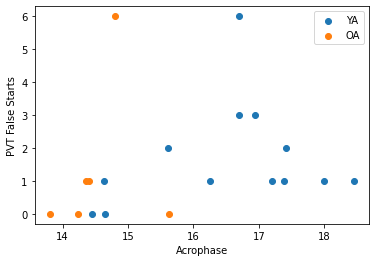

In [43]:
plt.scatter(ya['phi_10'].values, ya['FS'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['FS'].values, label = "OA")
plt.xlabel("Acrophase")
plt.ylabel("PVT False Starts")
plt.legend()

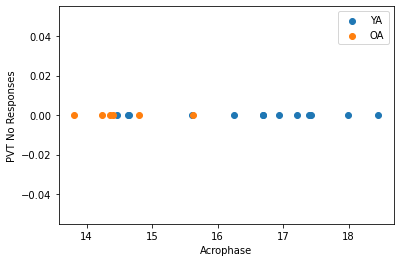

In [44]:
plt.scatter(ya['phi_10'].values, ya['NR'].values, label = "YA")
plt.scatter(oa['phi_10'].values, oa['NR'].values, label = "OA")
plt.xlabel("Acrophase")
plt.ylabel("PVT No Responses")
plt.legend()

## Mood and rhythm amplitude

In [45]:
pre = new[new['COVID'] == "Pre"]
post = new[new['COVID'] == "Post"]

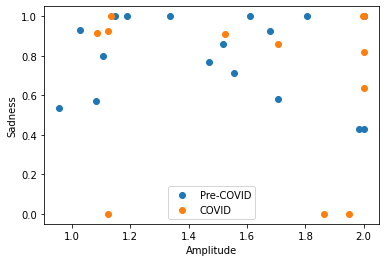

In [46]:
plt.scatter(pre['amp_10'].values, pre['Sadness'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Sadness'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Sadness")
plt.legend()

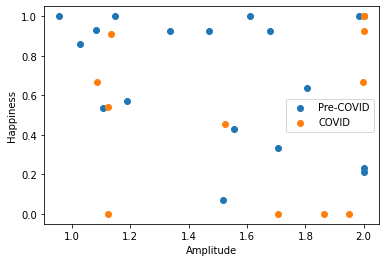

In [47]:
plt.scatter(pre['amp_10'].values, pre['Happiness'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Happiness'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Happiness")
plt.legend()

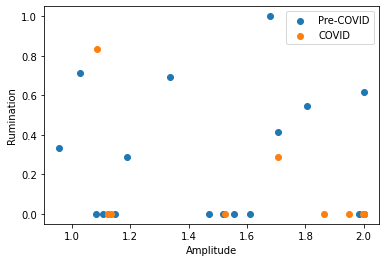

In [48]:
plt.scatter(pre['amp_10'].values, pre['Rumination'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Rumination'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Rumination")
plt.legend()

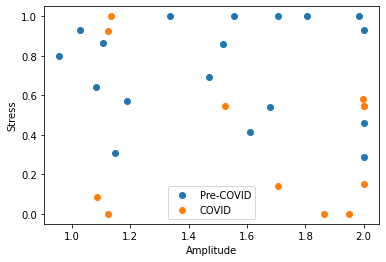

In [49]:
plt.scatter(pre['amp_10'].values, pre['Stress'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Stress'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Stress")
plt.legend()

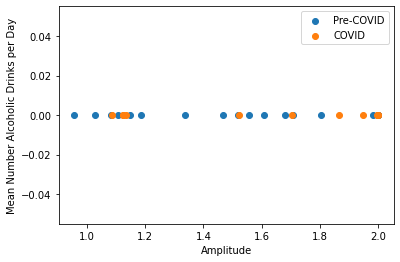

In [50]:
plt.scatter(pre['amp_10'].values, pre['Alcohol'].values, label = "Pre-COVID")
plt.scatter(post['amp_10'].values, post['Alcohol'].values, label = "COVID")
plt.xlabel("Amplitude")
plt.ylabel("Mean Number Alcoholic Drinks per Day")
plt.legend()